In [1]:
Pkg.add("DifferentialEquations")

 Resolving package versions...
  Updating `~/.julia/Project.toml`
 [no changes]
  Updating `~/.julia/Manifest.toml`
 [no changes]


In [1]:
using DifferentialEquations
using Plots
# http://docs.juliadiffeq.org/latest/tutorials/dde_example.html

In [24]:
const tau1 = 1.0; const tau2=0.2
function bc_model(du,u,h,p,t)
    du[1]=h(p,t-tau1)[1]
    du[2]=h(p,t-tau1)[1]+h(p,t-tau2)[2]
    du[3]=u[2]
end

bc_model (generic function with 2 methods)

In [31]:
lags = [tau1, tau2]
h(p,t) = ones(3)
tspan = (0.0,5.0)
u0 = [1.0,1.0,1.0]
prob = DDEProblem(bc_model,u0,h,tspan; constant_lags=lags)


DDEProblem with uType Array{Float64,1} and tType Float64. In-place: true
timespan: (0.0, 5.0)
u0: [1.0, 1.0, 1.0]

In [32]:
alg = MethodOfSteps(Tsit5())

MethodOfSteps{Tsit5,Nothing,Nothing,Nothing,false}(Tsit5(), nothing, nothing, nothing, 10)

In [33]:
sol = solve(prob,alg);

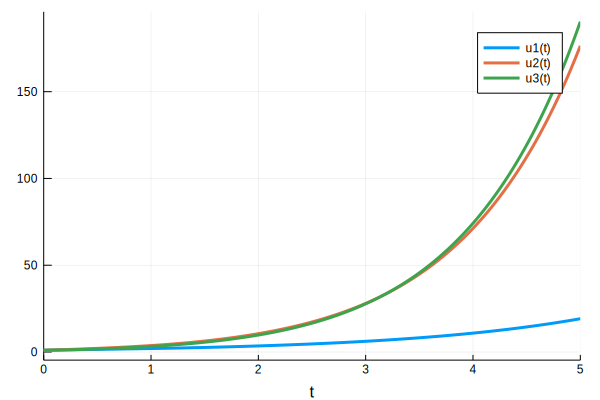

In [34]:
plot(sol)

In [35]:
sol(1:5)

t: 1:5
u: 5-element Array{Array{Float64,1},1}:
 [2.0, 3.71414, 3.18164]    
 [3.5, 10.5606, 9.77286]    
 [6.16667, 28.0053, 27.7379]
 [10.875, 71.2265, 74.163]  
 [19.175, 176.423, 190.344] 